https://mp.weixin.qq.com/s/bpYVd2IAGqnjfXnKllfWWw

In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import models,layers

In [27]:
df = pd.read_csv('../../dataset/titanic/train.csv')

In [28]:
df.shape

(891, 12)

In [29]:
dftrain_raw = df.loc[:500,:]
dftest_raw = df.loc[501:,:]

In [30]:
dftrain_raw.shape
dftest_raw.shape

(501, 12)

(390, 12)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Age')

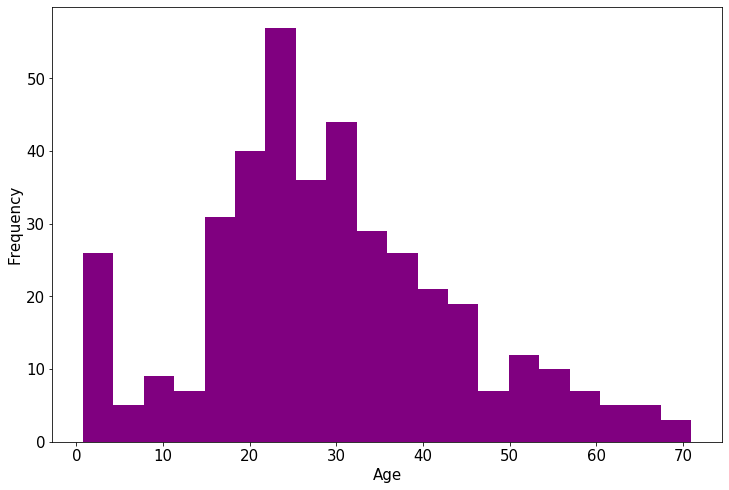

In [31]:
# 年龄分布情况
%matplotlib inline
%config InlineBackend.figure_format = 'png' # 此方法将会使图片以矢量图的形式显示
ax = dftrain_raw['Age'].plot(kind='hist',bins=20,color='purple',figsize=(12,8),fontsize=15)
ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Age')

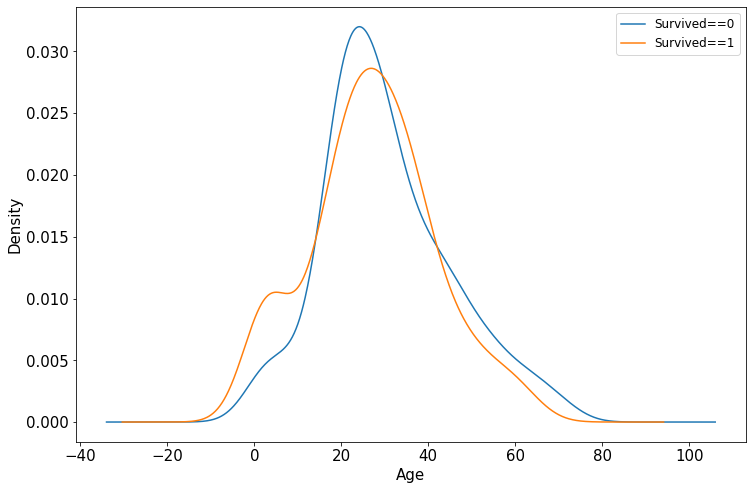

In [32]:
# 年龄和label的相关性
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
ax.legend(['Survived==0','Survived==1'],fontsize = 12)
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

In [33]:
def preprocessing(dfdata):
    
    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)
    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)


In [34]:
x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)
y_test = dftest_raw['Survived'].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )

x_train.shape = (501, 15)
x_test.shape = (390, 15)


In [35]:
# 定义模型
tf.keras.backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(20,activation='relu',input_shape=(15,)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 训练模型
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["acc"])
history = model.fit(x_train,y_train,batch_size=64,epochs=30,validation_split=0.2) # 分割一部分训练数据用于验证

Train on 400 samples, validate on 101 samples
Epoch 1/30
400/400 [==============================] - 0s 876us/step - loss: 1.7269 - acc: 0.5150 - val_loss: 1.2666 - val_acc: 0.5743
Epoch 2/30
400/400 [==============================] - 0s 50us/step - loss: 1.3356 - acc: 0.5900 - val_loss: 1.2019 - val_acc: 0.6040
Epoch 3/30
400/400 [==============================] - 0s 47us/step - loss: 1.1449 - acc: 0.6150 - val_loss: 1.1608 - val_acc: 0.5743
Epoch 4/30
400/400 [==============================] - 0s 52us/step - loss: 0.9994 - acc: 0.6150 - val_loss: 1.0248 - val_acc: 0.5743
Epoch 5/30
400/400 [==============================] - 0s 52us/step - loss: 0.8207 - acc: 0.6150 - val_loss: 0.8251 - val_acc: 0.5941
Epoch 6/30
400/400 [==============================] - 0s 57us/step - loss: 0.6846 - acc: 0.6850 - val_loss: 0.6833 - val_acc: 0.6832
Epoch 7/30
400/400 [==============================] - 0s 62us/step - loss: 0.5956 - acc: 0.6825 - val_loss: 0.6386 - val_acc: 0.6931
Epoch 8/30
400/400 [==

In [37]:
history.history

{'val_loss': [1.2666265704844257,
  1.2018931171681622,
  1.1607629969568536,
  1.0247934472442854,
  0.825067944455855,
  0.6833057574706503,
  0.6385729094543079,
  0.6158843087677909,
  0.6139718382665427,
  0.622801946531428,
  0.6269230641941033,
  0.6228321147437142,
  0.6219855906939743,
  0.6156308892929908,
  0.6129245572160966,
  0.6169408311938295,
  0.6273431500585953,
  0.6220706949139586,
  0.6085615264307155,
  0.6132423429205867,
  0.617531144973075,
  0.5898674260271658,
  0.5898461309399935,
  0.5973139479018674,
  0.592436681289484,
  0.6006868741299847,
  0.5873597264289856,
  0.5897060792044838,
  0.5776258220176885,
  0.5852578264651912],
 'val_acc': [0.5742574269228643,
  0.6039604013509089,
  0.5742574151199643,
  0.5742574151199643,
  0.5940594112518991,
  0.6831683203725532,
  0.6930693045701131,
  0.7227722748671428,
  0.7227722807685928,
  0.7128712965710329,
  0.7227722807685928,
  0.7128712906695829,
  0.702970300570573,
  0.7128712847681329,
  0.712871284

In [38]:
# 评估模型
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
def plot_metric(history,metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

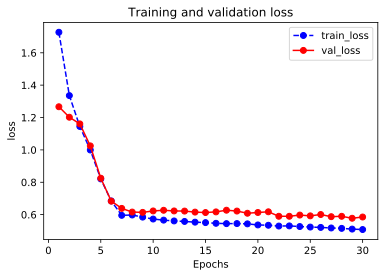

In [39]:
plot_metric(history,"loss")

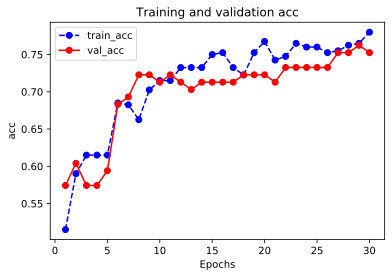

In [40]:
plot_metric(history,"acc")

In [41]:
model.evaluate(x = x_test,y = y_test)

390/390 [==============================] - 0s 46us/step


[0.548541011260106, 0.7538461541518187]

In [42]:
# 使用模型
# 预测概率 
model.predict(x_test[0:10])

array([[0.5901113 ],
       [0.69328743],
       [0.32374915],
       [0.6123037 ],
       [0.4875733 ],
       [0.5367194 ],
       [0.43804944],
       [0.2181748 ],
       [0.5684757 ],
       [0.27676156]], dtype=float32)

In [43]:
# 预测类别
model.predict_classes(x_test[0:10])

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [44]:
# 保存模型
# 1.keras方式保存
model.save('../../dataset/keras_model.h5')
del model # 删除现有模型
model = models.load_model('../../dataset/keras_model.h5')
model.evaluate(x_test,y_test)

390/390 [==============================] - 0s 194us/step


[0.548541011260106, 0.7538461541518187]

In [45]:
# 保存模型结构
json_str = model.to_json()

In [47]:
# 恢复模型结构
model_json = models.model_from_json(json_str)

In [49]:
# 保存模型权重
model.save_weights('../../dataset/keras_model_weight.h5')
# 恢复模型结构
model_json = models.model_from_json(json_str)
model_json.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
# 加载权重
model_json.load_weights('../../dataset/keras_model_weight.h5')
model_json.evaluate(x_test,y_test)

390/390 [==============================] - 0s 204us/step


[0.548541011260106, 0.7538461541518187]

In [50]:
# 2.tensorflow原生方式保存
# 保存权重，该方式仅仅保存权重张量
model.save_weights('../../dataset/tf_model_weights.ckpt',save_format='tf')


Consider using a TensorFlow optimizer from `tf.train`.


In [52]:
# 保存模型结构与模型参数到文件,该方式保存的模型具有跨平台性便于部署

model.save('../../dataset/tf_model_savedmodel')
print('export saved model.')

export saved model.


In [53]:
model_loaded = tf.keras.models.load_model('../../dataset/tf_model_savedmodel')
model_loaded.evaluate(x_test,y_test)

390/390 [==============================] - 0s 238us/step


[0.548541011260106, 0.7538461541518187]